In [1]:
from IPython.display import YouTubeVideo
from functools import partial
YTVideo_formato = partial(YouTubeVideo, width=640, height=400, rel=0, modestbranding=1)

# Procesamiento de imágenes digitales

En esta lección veremos:

- Imágenes son señales bidimensionales
- Definición de una imagen digital
- Percepción humana y modelos de color

## Una imagen como caso particular de una señal 2D

El siguiente es un ejemplo de una señal que tiene dos variables independientes 

$$
x, y \rightarrow I(x,y)
$$


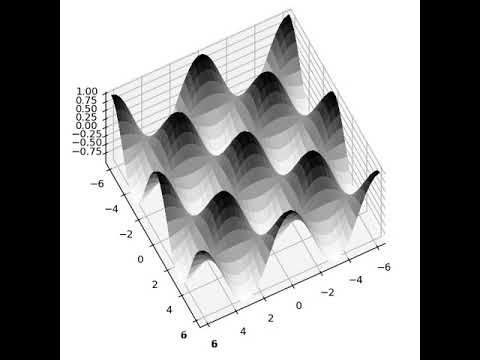

In [2]:
YTVideo_formato('AEJgW2jUdMs')

:::{important}

Podemos interpretar las variables independientes $x$ e $y$ como coordenadas en el espacio, donde la variable dependiente $I(x,y)$ se visualuza como un mapa de colores

:::

Bajo estas consideraciones se obtiene lo que llamamos una **imagen**. A continuación definiremos formalmente una imagen

## Definiendo una imagen digital

Una imagen digital es una señal con:

- Dos variables indepedientes discretas $x$ e $y$ que representan el espacio
- Una o más variables dependientes $I(x,y)$ que representan la intensidad del color según una codificación

En la práctica las imágenes digitales son un arreglo de NxM componentes

- $N$, el número de filas, que podemos interpretar como el **alto** de la imagen
- $M$, el número de columnas, que podemos interpretar como el **ancho** de la imagen

:::{note}

Cada elemento del arreglo se llama **pixel** (picture element)

:::

Los píxeles pueden ser 

- unidimensionales (imagen en blanco y negro)
- multidimensionales (RGB, HSV, HSL)

Un pixel suele representarse como una tupla de enteros de 8 bit sin signo, *i.e.* la intensidad está en el rango  $[0, 255]$. Otra representación común es una tupla de valores flotantes en el rango $[0.0, 1.0]$. A estos rangos les otorgamos una interpretación como mapa de color

En la siguiente figura podemos ver una imagen digital en escala de grises

<img src="images/image_matrix.png" width="600">

- A la izquierda: Representación en mapa de color, donde negro es 0.0 y blanco es 1.0
- A la derecha: Representación numérica


:::{attention}

¿Qué representa una imagen?

:::

Comúnmente una imagen es una representación de la intensidad lumínica en el rango óptico

Pero también se pueden representar otros rangos de radiación como los rayos X (radiografía), la radiación infraroja (termografía) y otros fenómenos que no son electromagnéticos, por ejemplo un ultrasonido

<table style="margin-left:auto;margin-right:auto;">
<tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/2/28/Valdivian_sea_lions.JPG" width="300">
</td><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/Termografia_kot.jpg" width="300">
</td></tr>
<tr><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Lung_X-ray.jpg/600px-Lung_X-ray.jpg" width="250">
</td><td>
    <img src="https://upload.wikimedia.org/wikipedia/commons/c/c7/CRL_Crown_rump_length_12_weeks_ecografia_Dr._Wolfgang_Moroder.jpg" width="300"
</td></tr>
</table>

*Todas las imágenes de esta lámina son de wikipedia

:::{attention}

¿Cómo se obtiene una imagen digital?

:::

Para el caso electromagnético se aprovecha el [efecto fotoeléctrico](https://es.wikipedia.org/wiki/Efecto_fotoel%C3%A9ctrico), es decir los electrones que se desprenden de un material semi-conductor cuando un fotón los impacta, como muestra la siguiente figura

<img src="images/photons-hit-silicon.jpg" width="400">

:::{note}

Hoy en día las cámaras digitales, webcams, celulares y también microscopios y telescopios utilizan tecnologías *Charged Coupled Device* (CCD) y *Complementary Metal-Oxide Semiconductor* (CMOS) para capturar imágenes digitales 

:::

<img src="images/CCD_sensor_diagram.jpg" width="400">

Un sensor CCD está dividido en una grilla y cada elemento de la grilla "cuenta" los fotones que lo golpean. Luego la cuenta se mapea como un valor numérico entero o flotante. Los receptores pueden ajustarse para aceptar fotones de un cierto rango de frecuencias (color)



## Manipulación de imágenes con Python

Hay bastantes opciones para manipular imágenes con Python. Sin embargo en este curso utilizaremos principalmente la librería [OpenCV](https://opencv.org/) y en menor medida la librería [pillow](https://pillow.readthedocs.io/en/stable/). 

OpenCV es una librería de visión computacional que incluye funcionalidad para leer, procesar, filtrar y realizar inteligencia artificial con imágenes. Además se caracteríza por ser sumamente eficiente, es una librería escrita en C++ con *bindings* para Python y otros lenguajes

El siguiente ejemplo muestra como leer una imagen con OpenCV

In [3]:
import cv2
valdivia = cv2.imread('data/valdivia.jpg')

Si estudiamos en mayor detalle que es lo que obtuvimos:

In [4]:
print(f"Tipo: {type(valdivia)}")
print(f"Tamaño: {repr(valdivia.shape)}")
print(f"Tipo: {valdivia.dtype}")

Tipo: <class 'numpy.ndarray'>
Tamaño: (350, 650, 3)
Tipo: uint8


Hemos obtenido un tensor de 350 filas, 650 columnas y 3 canales

:::{important}

Los datos de la imagen se recuperan como una estructura `ndarray` de la librería NumPy. Esto nos habilita para hacer todo tipo de manipulación numérica con la imagen como si está fuera una matriz

:::

Visualizemos la imagen que acabamos de importar 

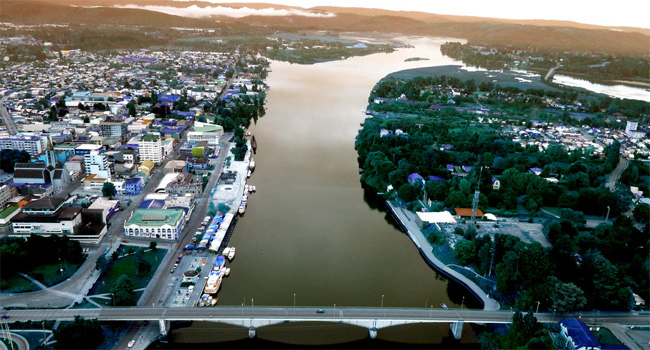

In [5]:
from PIL import Image
Image.fromarray(valdivia)  # Para mostrar la imagen en el cuadernillo

Los colores están un poco extraños

:::{warning}

La librería OpenCV utiliza como convensión de canales el estándar BGR (Blue-Green-Red). Mientras que pillow y otras librerías esperan una imagen en RGB. 

:::

Podemos cambiar de estándar de canal con la función `cvtColor` y el *flag* adecuado como se muestra a continuación

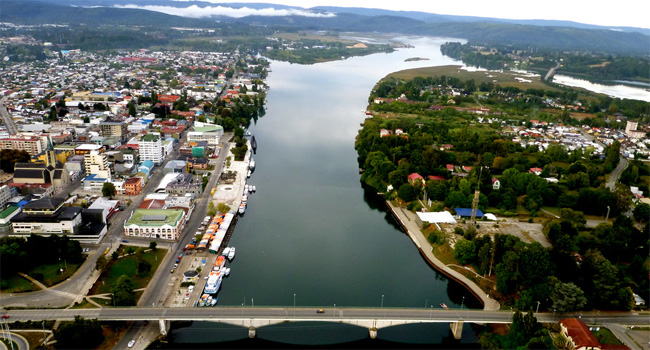

In [6]:
valdivia = cv2.cvtColor(valdivia, cv2.COLOR_BGR2RGB)
Image.fromarray(valdivia)

Como ya se dijo, una vez importada podemos operar con la imagen como su fuera cualquier otro tensor en formato ndarray

Por ejemplo podemos tomar un trozo o *slice* de la imagen con

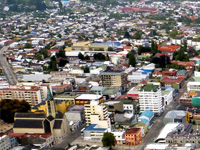

In [7]:
centro_de_valdivia = valdivia[50:200, :200]

Image.fromarray(centro_de_valdivia)

O podríamos espejar la imagen inviertiendo su eje horizontal

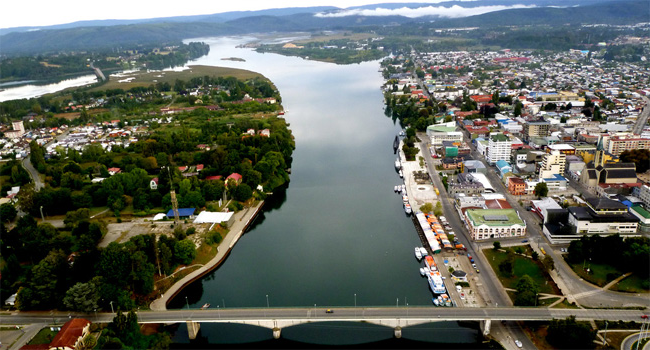

In [8]:
Image.fromarray(valdivia[:, ::-1, :])

## Modelo de color RGB

La imagen que estabamos usando tiene tres canales y cada canal se interpreta como la intensidad de color

- en rojo
- en verde
- en azul

respectivamente


Esto corresponde al modelo de colores RGB (red, green, blue)

> Combinando distintos valores de intensidad en rojo, verde y azul se obtienen los demás colores

Podemos visualizar cada canal por separado como una imagen en escala de grises, por ejemplo

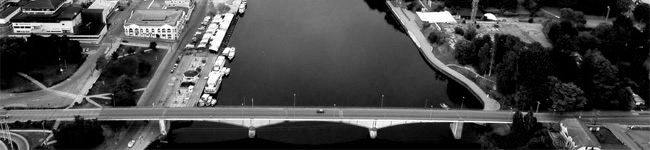

In [9]:
sub_valdivia = valdivia[200:, : :]
Image.fromarray(sub_valdivia[:, :, 0])

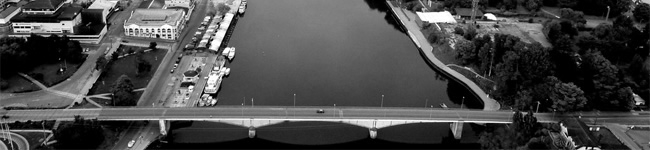

In [10]:
Image.fromarray(sub_valdivia[:, :, 1])

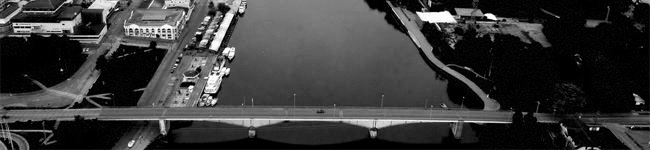

In [11]:
Image.fromarray(sub_valdivia[:, :, 2])

## Visión humana

El ojo humano tiene en su retina dos tipos de fotoreceptores: **bastones y conos**

Los bastones 

- 120 millones aprox en la retina
- Perciben intensidad pero no color
- Requieren poco brillo para producir una señal
- Tienen baja agudeza (menos sencibles a los detalles)

Los conos 

- 6 millones aprox en la retina
- Existen tres tipos de conos, cada uno sintonizado a una longitud de onda
- Requieren mucho brillo para producir una señal
- Tienen alta agudeza visual


<img src="images/cones_rods.png" width="800">


Referencia: http://www.danielgmurphy.com/physics/1_intro/contents_phyics1.html



La respuesta retinal inspira la siguiente transformación de RGB a escala de grises:

$$
I = 0.299 R + 0.587 G + 0.114 B
$$


Esta transformación está implementada en OpenCV. Para convertir una imagen a color a escala de grises utilizamos

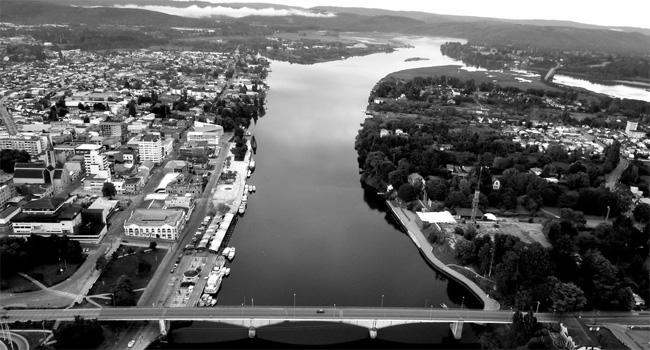

In [12]:
valdivia = cv2.imread('data/valdivia.jpg')
valdivia_bw = cv2.cvtColor(valdivia, cv2.COLOR_BGR2GRAY)
Image.fromarray(valdivia_bw)

## Otros modelos de colores

RGB no es el único modelo de color. Por ejemplo el modelo **HSV** (Hue, Saturation, Value) es muy usado en software de diseño y computación gráfica

- Hue: Corresponde al tono o color puro
- Saturation: Corresponde a ajustar el brillo
- Value: Corresponde a mezclar con negro para generar sombras

<img src="images/hsv_cilinder.jpg" width="400">

Por ejemplo, la imagen anterior en HSV

In [13]:
valdivia = cv2.imread('data/valdivia.jpg')
sub_valdivia_hsv = cv2.cvtColor(valdivia[200:, : :], cv2.COLOR_BGR2HSV)

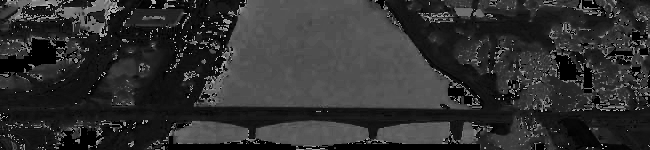

In [14]:
Image.fromarray(sub_valdivia_hsv[:, :, 0])

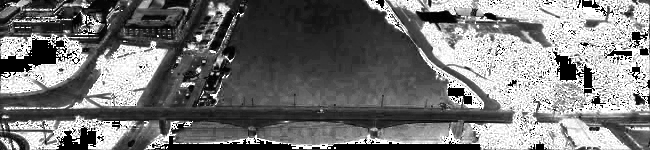

In [15]:
Image.fromarray(sub_valdivia_hsv[:, :, 1])

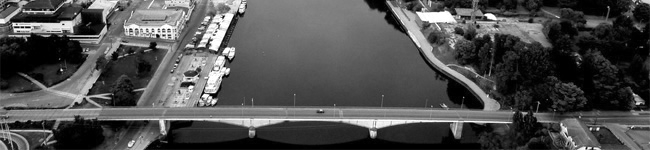

In [16]:
Image.fromarray(sub_valdivia_hsv[:, :, 2])

El estándar **[YCbCr](https://en.wikipedia.org/wiki/YCbCr)** corresponde a una familia de modelos muy usado en fotografía digital 

- Y, se llama luma, corresponde a la luminancia
- Cb y Cr, se llaman chroma, corresponde a la "diferencia en azul" y "diferencia en rojo"

Existe una transformación directa entere YCbCr y RGB

$$
Y = K_R R + K_G G + K_B B \\
C_b = 0.5 \frac{B - Y}{1 - K_B} \\
C_R = 0.5 \frac{R - Y}{1 - K_R}
$$

donde $K_R + K_G + K_B = 1$

Los distintos modelos de la familia YCbCr se diferencia en sus valores de $K_R$, $K_G$ y $K_B$

Por ejemplo la imagen anterior en YCbCr

In [17]:
valdivia = cv2.imread('data/valdivia.jpg')
sub_valdivia_YCbCr = cv2.cvtColor(valdivia[200:, : :], cv2.COLOR_BGR2YCrCb)

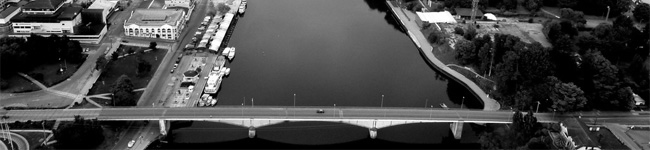

In [18]:
Image.fromarray(sub_valdivia_YCbCr[:, :, 0])

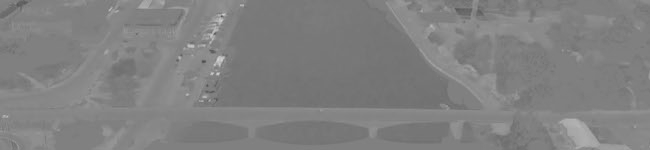

In [19]:
Image.fromarray(sub_valdivia_YCbCr[:, :, 1])

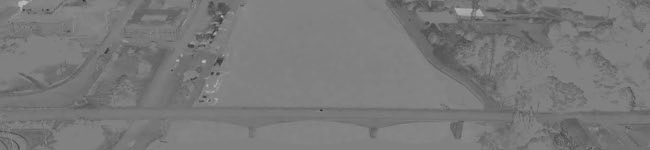

In [20]:
Image.fromarray(sub_valdivia_YCbCr[:, :, 2])